# GPU accelerated data augmentation

This code provides standard augmentation strategies on the GPU, as some of these can be intensive on the CPU. Our GPU translation is based on [PyTorch](https://pytorch.org/). The current version supports both 2D and 3D data augmentation. 

## Installation
You can install the augmentation library through pip: 
<pre><code>pip install augmentation</code></pre>

## Usage
Import the required modules:

In [1]:
import imageio
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from augmentation.augmentation_2d import *

Read an image into a tensor and transfer it to the GPU:

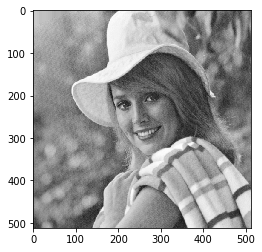

In [2]:
x = imageio.imread('augmentation/img/elaine.png').astype('float')
shape = x.shape
x = torch.Tensor(x).unsqueeze(0).unsqueeze(0).cuda()
plt.imshow(x[0,0,:,:].cpu(), cmap="gray")

Flip the image along the x and y-axis: 

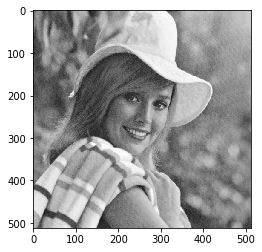

In [3]:
flipx = FlipX(shape)
y = flipx(x)
plt.imshow(y[0,0,:,:].cpu(), cmap="gray")

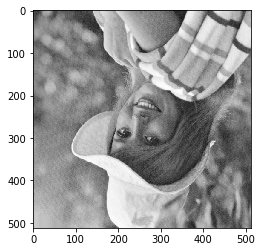

In [4]:
flipy = FlipY(shape)
y = flipy(x)
plt.imshow(y[0,0,:,:].cpu(), cmap="gray")

Rotate the image 90 degrees: 

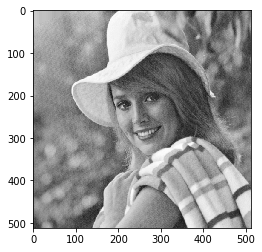

In [5]:
rotate = Rotate90(shape)
y = rotate(x)
plt.imshow(y[0,0,:,:].cpu(), cmap="gray")

Rotate the image randomly: 

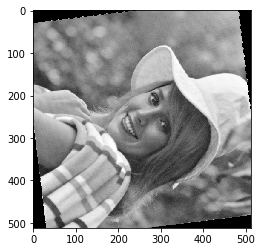

In [6]:
rotate = RotateRandom(shape)
y = rotate(x)
plt.imshow(y[0,0,:,:].cpu(), cmap="gray")

Rescale the image by a specific scaling factor

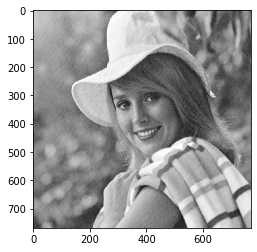

In [7]:
rescale = Scale(scale_factor=1.5)
y = rescale(x)
plt.imshow(y[0,0,:,:].cpu(), cmap="gray")

Select a random crop from the image

torch.Size([1, 1, 256, 256])


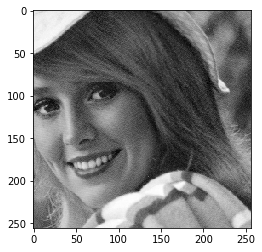

In [8]:
crop = RandomCrop(crop_shape=(256, 256))
y = crop(x)
print(y.size())
plt.imshow(y[0,0,:,:].cpu(), cmap="gray")

Add noise to the image:

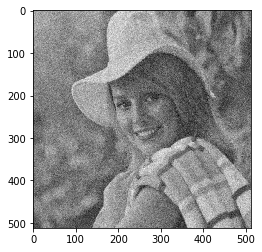

In [9]:
noise = AddNoise(sigma_min=20, sigma_max=20)
y = noise(x)
plt.imshow(y[0,0,:,:].cpu(), cmap="gray")

Apply random deformations to the image: 

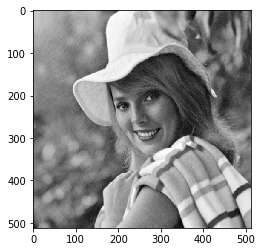

In [10]:
deform = RandomDeformation(shape, sigma=0.01)
y = deform(x)
plt.imshow(y[0,0,:,:].cpu(), cmap="gray")